### Bank Customer Churn Prediction
# 1. Introduction
Task: The goal of this project is to find a good model that predicts whether a customer churn or not. Moreover, I will analyze top factors that influence user retention.



# 2. Setup Google Drive Environment / Data Collection


In [1]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id = "1YZpoKgpz1r1GoVstYN8JhLzQTZr7Gz8u"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('churn.csv')

# 3. Data Set Review and preparation
1. Better understand our data set
2. doing data cleaning and prepare for EDA(Explotary Data Analysis) 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('churn.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum() # check if there is missing value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

for EDA and further prediction, we know that 
1. Rownumber is the index
2. CustomerId is unique id for each customer
3. Surname is just name that should not being our feature

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 4. Exploratory Data Analysis
Task: get insights on our churn data set.

In [11]:
df['Exited'].value_counts() / len(df)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

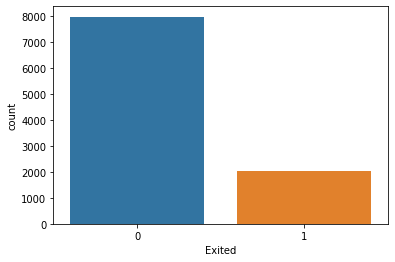

In [12]:
sns.countplot(x = 'Exited', data = df)

Exit status result: 
79.63% of our customers are retendtion user. 20.37% Exited

In [21]:
category_features = df.drop(columns = ['CreditScore', 'Balance', 'Tenure','EstimatedSalary','Age', 'Exited']).columns


In [22]:
category_features

Index(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'], dtype='object')

In [23]:
len(category_features)

5

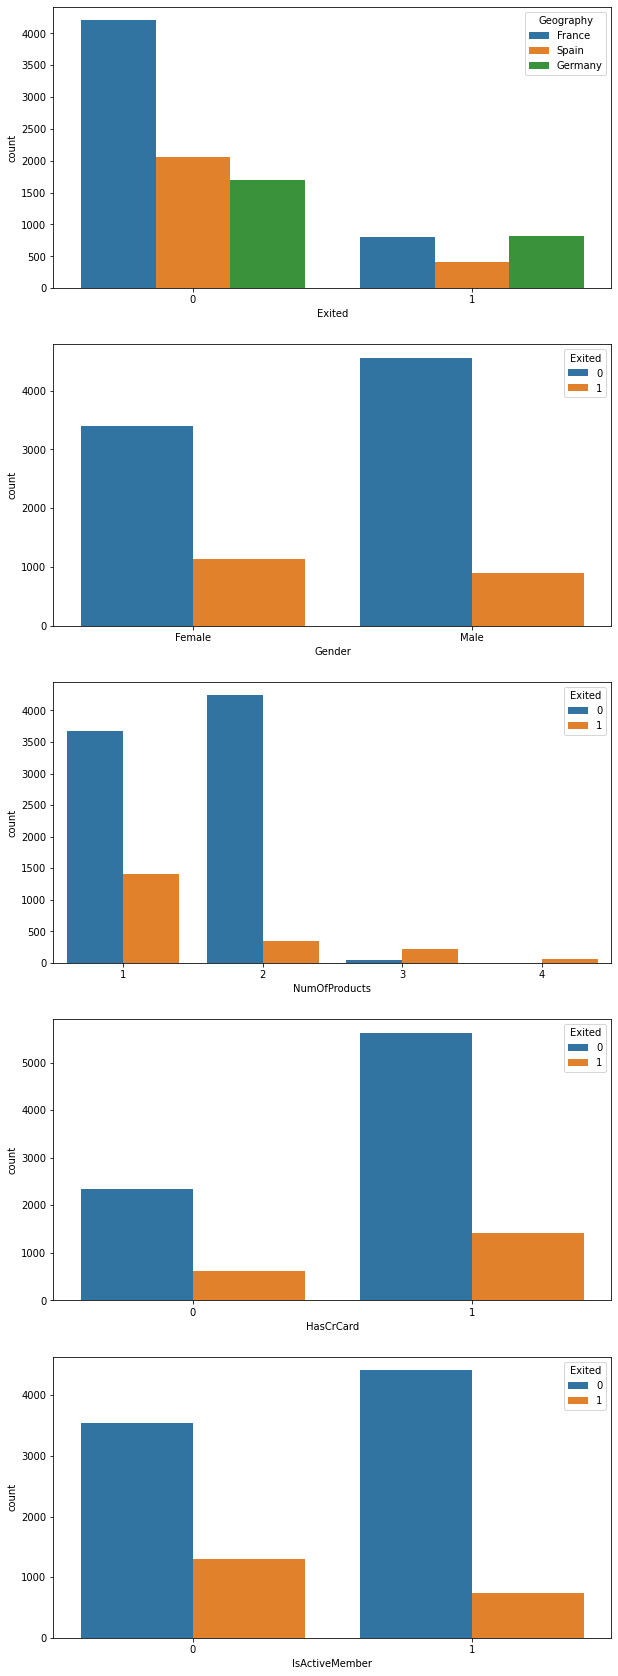

In [42]:
fig, axes = plt.subplots( nrows= 5, figsize = (10, 30))

sns.countplot( x = 'Exited', hue = 'Geography', data = df, ax = axes[0])
sns.countplot( x = category_features[1], hue = 'Exited', data = df, ax = axes[1])
sns.countplot( x = category_features[2], hue = 'Exited', data = df, ax = axes[2])
sns.countplot( x = category_features[3], hue = 'Exited', data = df, ax = axes[3])
sns.countplot( x = category_features[4], hue = 'Exited', data = df, ax = axes[4])

1. If customers have more products, they tend to exit
2. compare to male, female has higher the proporation of exited
3. Germany customer has higher the proporation of exited 

In [32]:
numerical_features = [x for x in df.columns if x not in category_features and x != 'Exited']

In [33]:
numerical_features

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

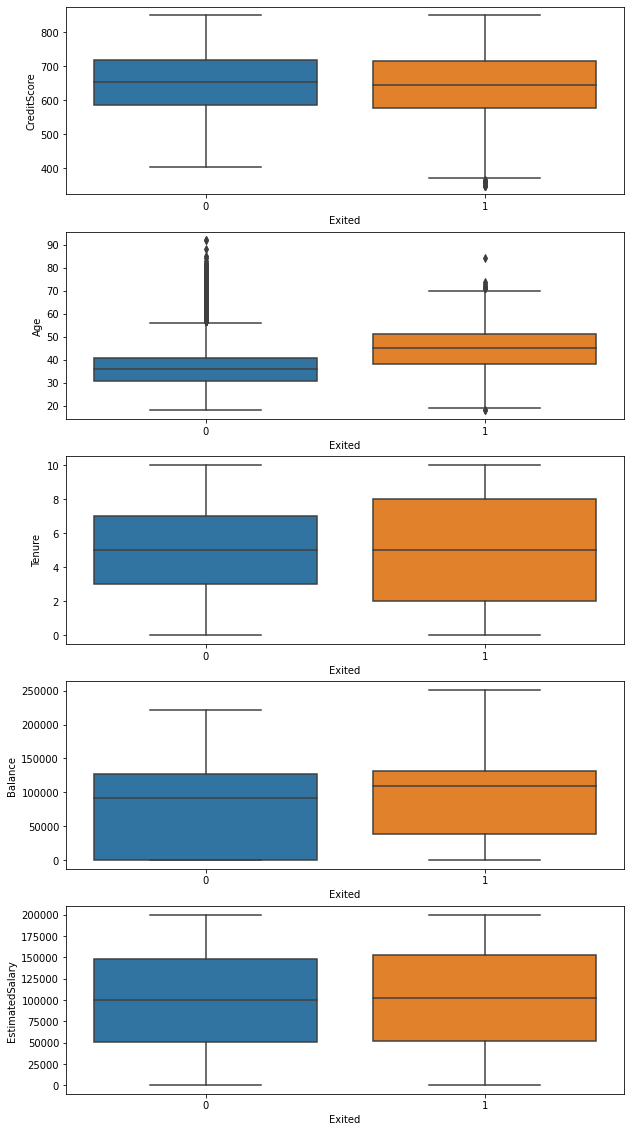

In [36]:
fig, axes = plt.subplots( nrows= 5, figsize = (10, 20))

sns.boxplot( x = 'Exited', y = numerical_features[0], data = df, ax = axes[0])
sns.boxplot( x = 'Exited', y = numerical_features[1], data = df, ax = axes[1])
sns.boxplot( x = 'Exited', y = numerical_features[2], data = df, ax = axes[2])
sns.boxplot( x = 'Exited', y = numerical_features[3], data = df, ax = axes[3])
sns.boxplot( x = 'Exited', y = numerical_features[4], data = df, ax = axes[4])

1. older people tend to exit
2. customer, who has higher balance, tend to exit
3. customer, who is the lower tenure or higher tenure, tend to exit 

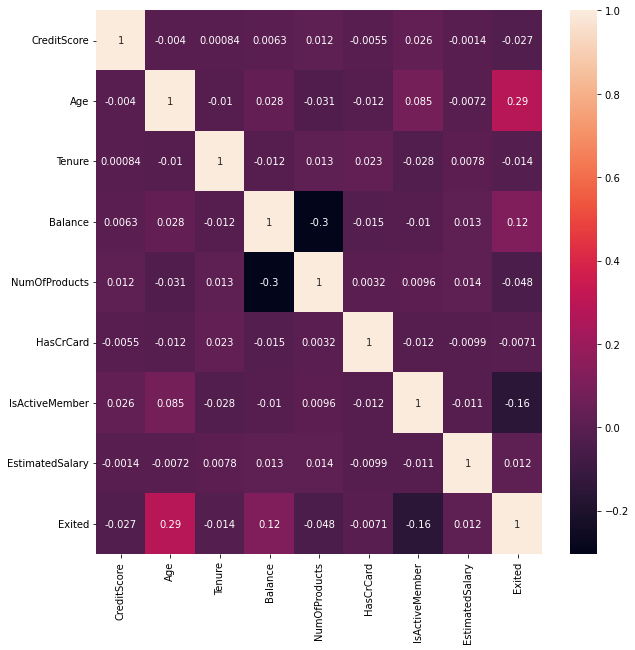

In [40]:
plt.figure( figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

# 5. Feature Engineering preprocessing

In [11]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [12]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [13]:
cat_cols = X.columns[X.dtypes == 'Object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [14]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [15]:
cat_cols

Index([], dtype='object')

Split Data set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state= 101)

In [18]:
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


In [19]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7101,831,Spain,Female,44,10,0.00,1,0,1,47729.33
6566,525,Germany,Female,30,0,157989.21,2,1,1,100687.67
9455,689,Spain,Female,55,4,0.00,2,1,1,58442.25
2056,539,Spain,Male,38,6,0.00,1,1,1,152880.07
6297,807,France,Female,34,1,0.00,1,0,0,114448.13


dealing with categorical feature:
1. one hot encoding
2. gender feature replaced by 1: female, 0: male

In [20]:
X_train['Gender'] = X_train['Gender'].map({'Female': 1, 'Male': 0})
X_test['Gender'] = X_test['Gender'].map({'Female': 1, 'Male': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
def OneHotEncoding(df, enc, categories):
  transforming_df = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop = True), transforming_df], axis = 1).drop(categories, axis = 1)

In [23]:
categories = ['Geography']

In [24]:
enc_one_hot = OneHotEncoder()

In [25]:
enc_one_hot.fit(X_train[categories])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [26]:
X_train = OneHotEncoding(X_train, enc_one_hot, categories)
X_test = OneHotEncoding(X_test, enc_one_hot, categories)

In [27]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,831,1,44,10,0.00,1,0,1,47729.33,0.0,0.0,1.0
1,525,1,30,0,157989.21,2,1,1,100687.67,0.0,1.0,0.0
2,689,1,55,4,0.00,2,1,1,58442.25,0.0,0.0,1.0
3,539,0,38,6,0.00,1,1,1,152880.07,0.0,0.0,1.0
4,807,1,34,1,0.00,1,0,0,114448.13,1.0,0.0,0.0


dealing with numerical features:
1. using standardizing data set method to reduce single feature's influence

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
Scaled_X_train = scaler.fit_transform(X_train[num_cols])
Scaled_X_test = scaler.transform(X_test[num_cols])

# 6. Model Training 
1. LogisticRegression
2. KNN
3. RandomForest
4. SVM
5. Xgboost

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

6.1 Logistic regression

In [32]:
l1_ratio = np.linspace(0, 1, 20)
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 100],
              'penalty':('l1', 'l2', 'elasticnet'),
              'max_iter': [10000],
              'l1_ratio': l1_ratio}


In [33]:
logistic_grid = GridSearchCV(LogisticRegression(solver = 'saga'), param_grid = param_grid, cv = 5)

In [39]:
logistic_grid.fit(Scaled_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (p

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 100],
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.9473

In [34]:
def print_GridSearch_result(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [41]:
print_GridSearch_result(logistic_grid)

Best score: 0.8068
Best parameters set:
C:10
l1_ratio:0.0
max_iter:10000
penalty:l2


6.2 KNN(K nearest Neighbor)

In [35]:
param_grid_knn = { 
    'n_neighbors': [1, 3, 5, 7, 9]
}

In [42]:
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid= param_grid_knn, cv = 5)
knn_grid.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
print_GridSearch_result(knn_grid)

Best score: 0.8405333333333334
Best parameters set:
n_neighbors:9


6.3 Random Forest

In [44]:
param_grid_RF = {
    'n_estimators': [20, 50, 80, 100],
    'max_depth': [2, 3, 5, 7, 10]
}

In [45]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid= param_grid_RF, cv = 5)
rf_grid.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [46]:
print_GridSearch_result(rf_grid)

Best score: 0.8568
Best parameters set:
max_depth:7
n_estimators:80


6.4 SVM(super vector machine)

In [36]:
param_grid_svm = {'C': [0.1, 0.5, 1, 10, 50],
                  'kernel': ['poly']}

In [37]:
svm_grid = GridSearchCV(SVC(), param_grid= param_grid_svm, cv = 5)
svm_grid.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 10, 50], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print_GridSearch_result(svm_grid)

Best score: 0.8524
Best parameters set:
C:50
kernel:poly


6.5 Extreme Gradient boosting classifier

In [47]:
param_grid_xgb = { 'max_depth': [2, 3, 5, 7],
                  'n_estimators': [10, 50, 100],
                  'min_samples_split': [2, 4, 5, 7]}

In [48]:
xgb_grid = GridSearchCV(XGBClassifier(), param_grid = param_grid_xgb, cv = 5)
xgb_grid.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 5, 7],
                         'min_samples_split': [2, 4, 5, 7],
                         'n_estimators': [10, 50, 100]},
        

In [49]:
print_GridSearch_result(xgb_grid)

Best score: 0.8582666666666666
Best parameters set:
max_depth:3
min_samples_split:2
n_estimators:100


# 7. Result Evaluation

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve




7.1 Logistic regression evaluation

In [71]:
logic_pred = logistic_grid.predict(Scaled_X_test)
confusion_matrix(y_test, logic_pred)

array([[1926,   65],
       [ 423,   86]])

In [52]:
print(classification_report(y_test, logic_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.57      0.17      0.26       509

    accuracy                           0.80      2500
   macro avg       0.69      0.57      0.57      2500
weighted avg       0.77      0.80      0.76      2500



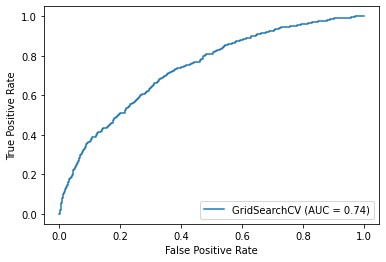

In [53]:
plot_roc_curve(logistic_grid, Scaled_X_test, y_test)

7.2 KNN Evaluation

In [56]:
knn_pred = knn_grid.predict(Scaled_X_test)
confusion_matrix(y_test, knn_pred)

array([[1910,   81],
       [ 326,  183]])

In [57]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1991
           1       0.69      0.36      0.47       509

    accuracy                           0.84      2500
   macro avg       0.77      0.66      0.69      2500
weighted avg       0.82      0.84      0.82      2500



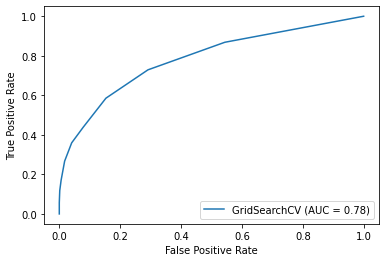

In [58]:
plot_roc_curve(knn_grid, Scaled_X_test, y_test)

7.3 Random Forest Evaluation

In [59]:
rf_pred = rf_grid.predict(Scaled_X_test)
confusion_matrix(y_test, rf_pred)

array([[1940,   51],
       [ 316,  193]])

In [60]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1991
           1       0.79      0.38      0.51       509

    accuracy                           0.85      2500
   macro avg       0.83      0.68      0.71      2500
weighted avg       0.85      0.85      0.83      2500



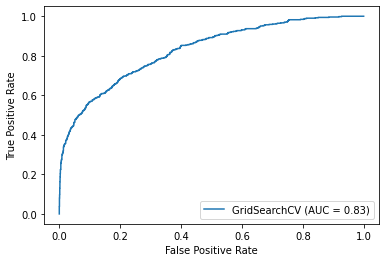

In [61]:
plot_roc_curve(rf_grid, Scaled_X_test, y_test)

7.4 SVM Evaluation

In [62]:
svm_pred = svm_grid.predict(Scaled_X_test)
confusion_matrix(y_test, svm_pred)

array([[1961,   30],
       [ 348,  161]])

In [63]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1991
           1       0.84      0.32      0.46       509

    accuracy                           0.85      2500
   macro avg       0.85      0.65      0.69      2500
weighted avg       0.85      0.85      0.82      2500



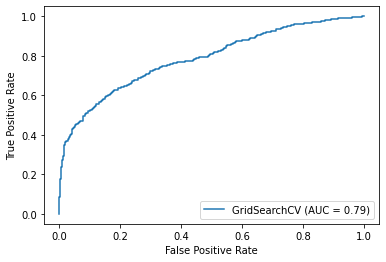

In [64]:
plot_roc_curve(svm_grid, Scaled_X_test, y_test)

7.5 xgboost evaluation

In [65]:
xgb_pred = xgb_grid.predict(Scaled_X_test)
confusion_matrix(y_test, xgb_pred)

array([[1925,   66],
       [ 301,  208]])

In [66]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1991
           1       0.76      0.41      0.53       509

    accuracy                           0.85      2500
   macro avg       0.81      0.69      0.72      2500
weighted avg       0.84      0.85      0.84      2500



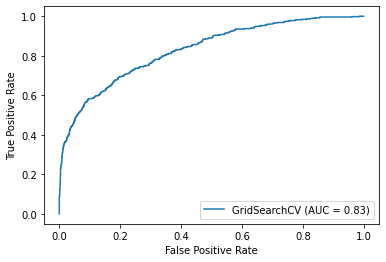

In [67]:
plot_roc_curve(xgb_grid, Scaled_X_test, y_test)


3. the best model that gives a decent balance of the recall and precision is the extreme gradient boosting where according to the fit on the training set, with a precision score on 1's of 0.76, out of all customers that the model thinks will churn, 85% do actually churn and with the recall score of 0.41 on the 1's, the model is able to highlight 53% of all those who churned.